<a href="https://colab.research.google.com/github/Raajarapu/COLAB_practice/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOGISTIC REGRESSION

## Problem Statement

#### The objective of this project is to develop a logistic regression model to predict the presence of heart disease based on various patient attributes. Using the Heart Disease dataset, we will perform data preprocessing, exploratory data analysis (EDA), model building, and evaluation to determine the model's effectiveness in predicting heart disease.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,confusion_matrix,classification_report,roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from scipy import stats
import statsmodels.api as sm

In [ ]:
df2 = pd.read_csv("heart.csv")
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df2.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df2.shape

(303, 14)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Finding how many are have heart decess positive and negative

In [ ]:
print(df2['target'].value_counts())

target
1    165
0    138
Name: count, dtype: int64


In [ ]:
df2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df2.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


 # Pair plot with each attribute which are co-relatted.

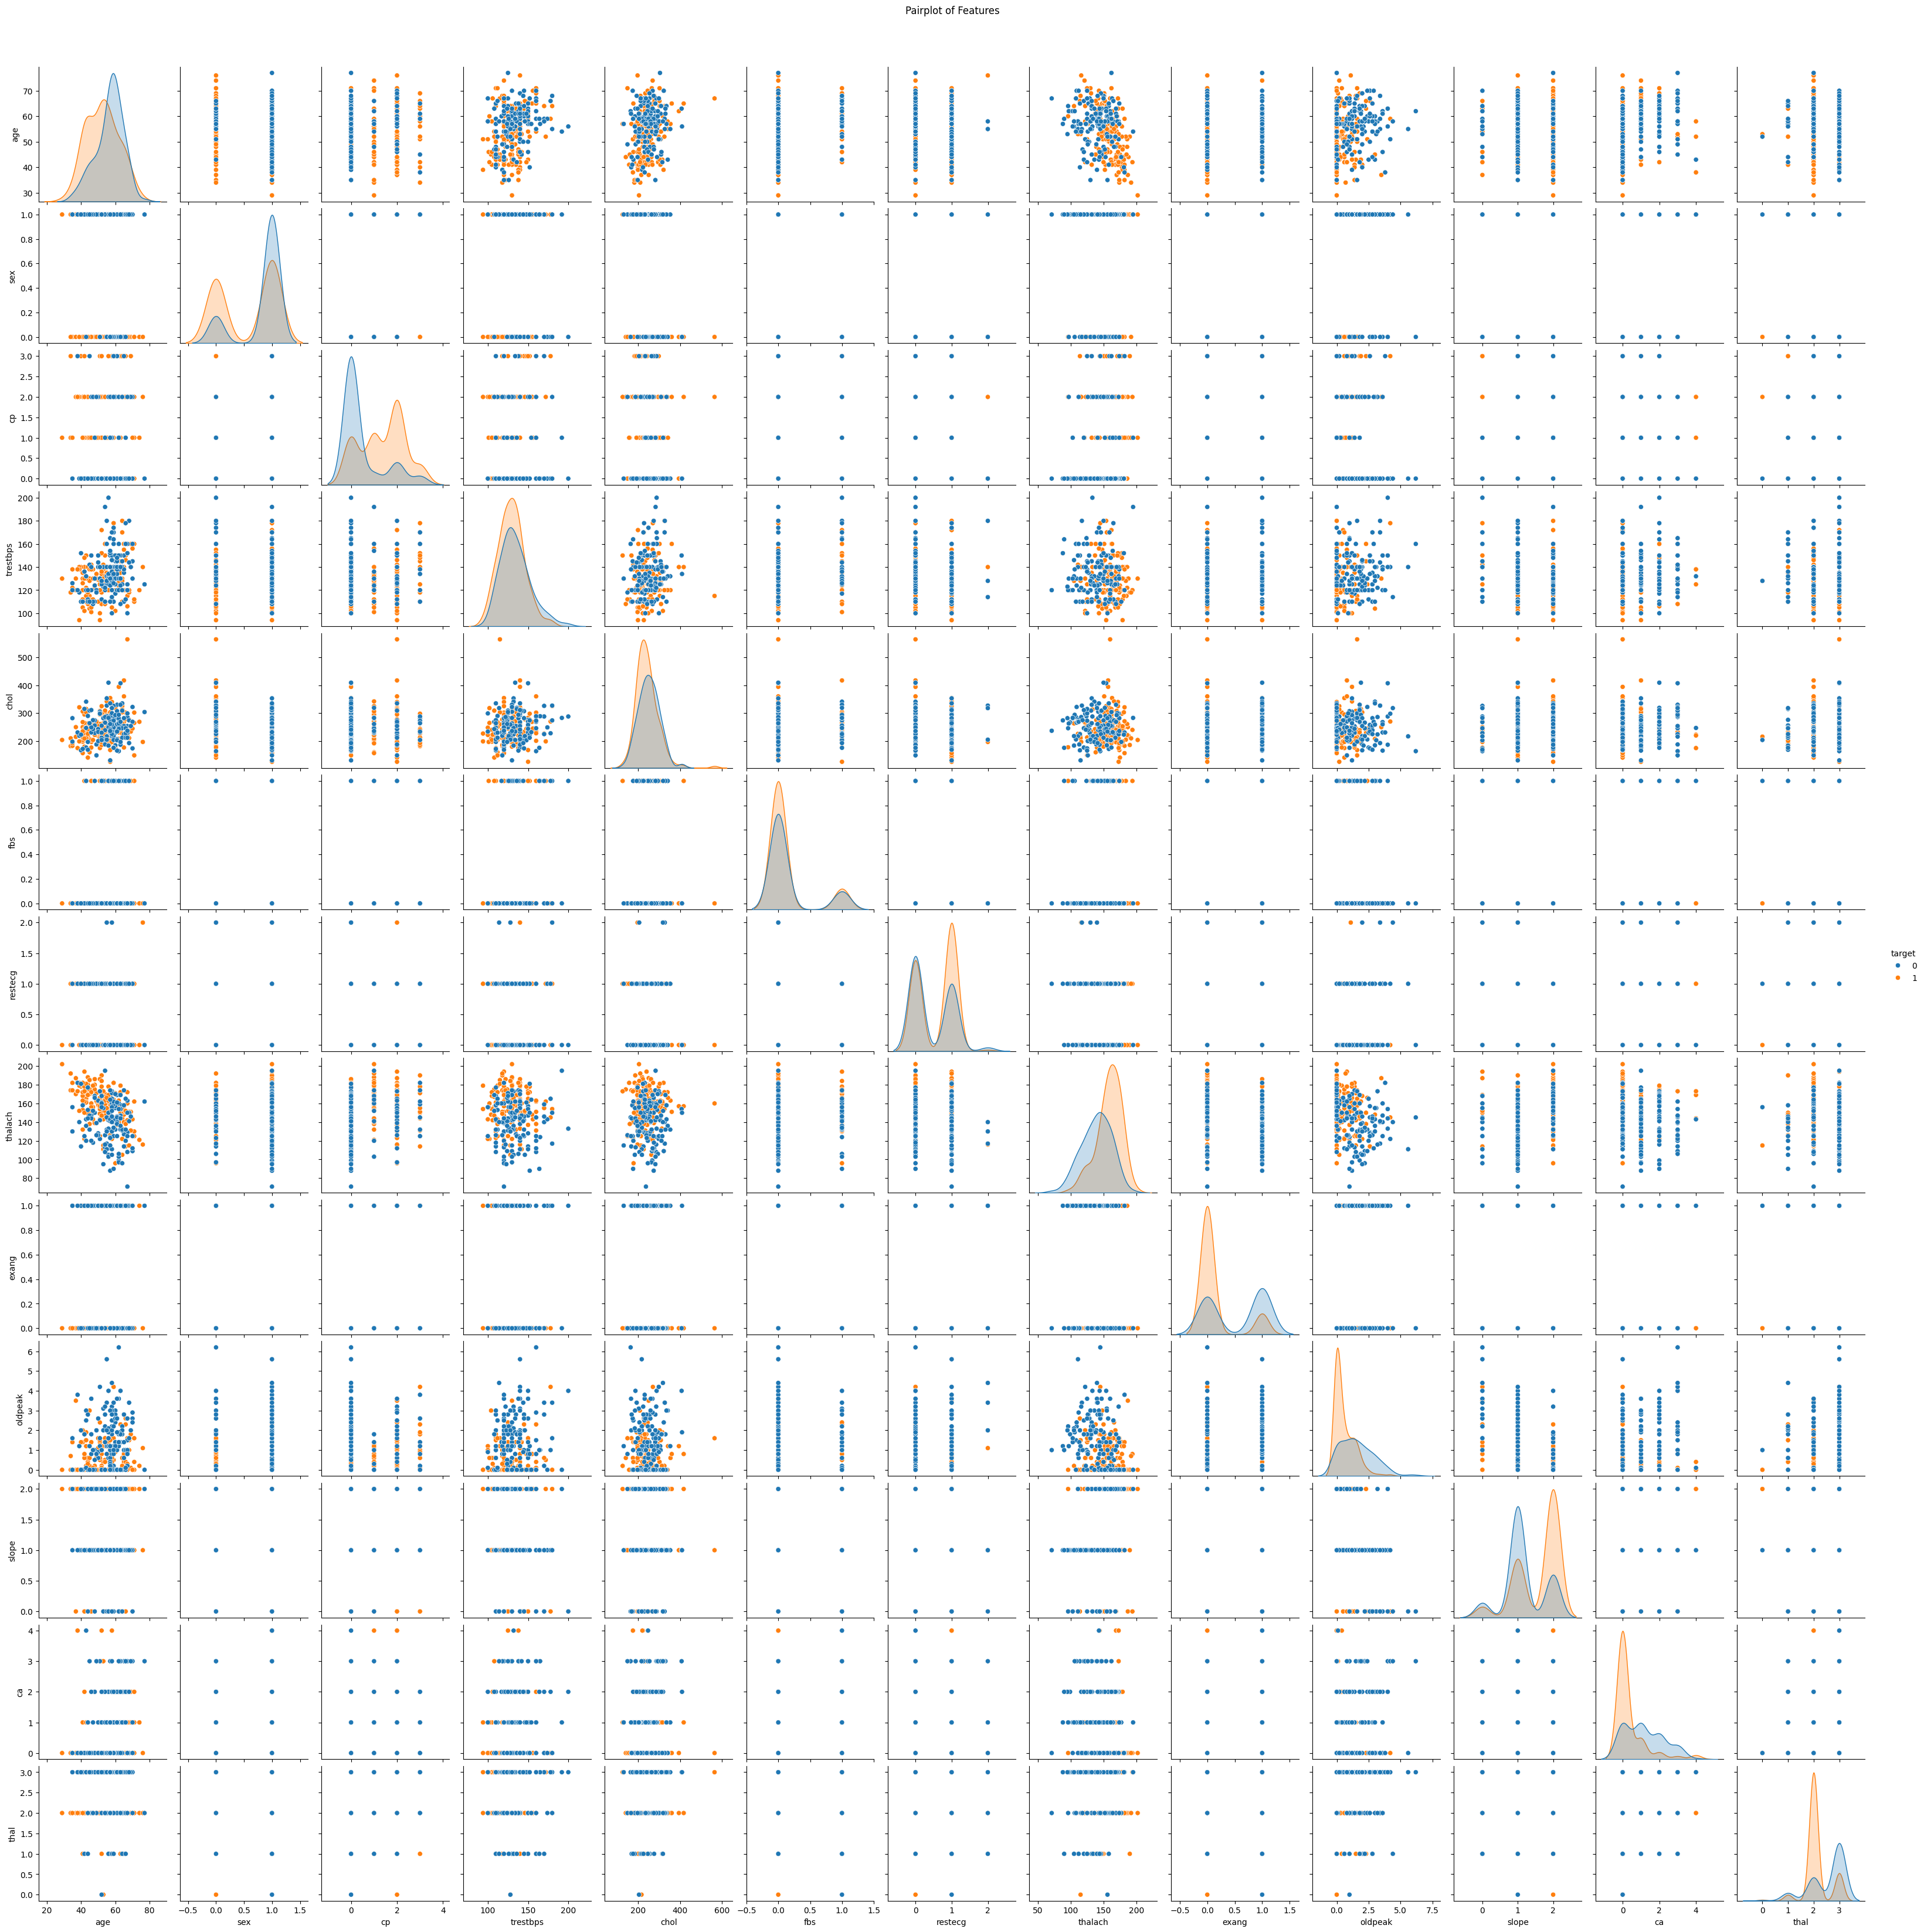

In [ ]:
sns.pairplot(df2, hue='target')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

# Hist-plot for each attribute

<Figure size 2000x1500 with 0 Axes>

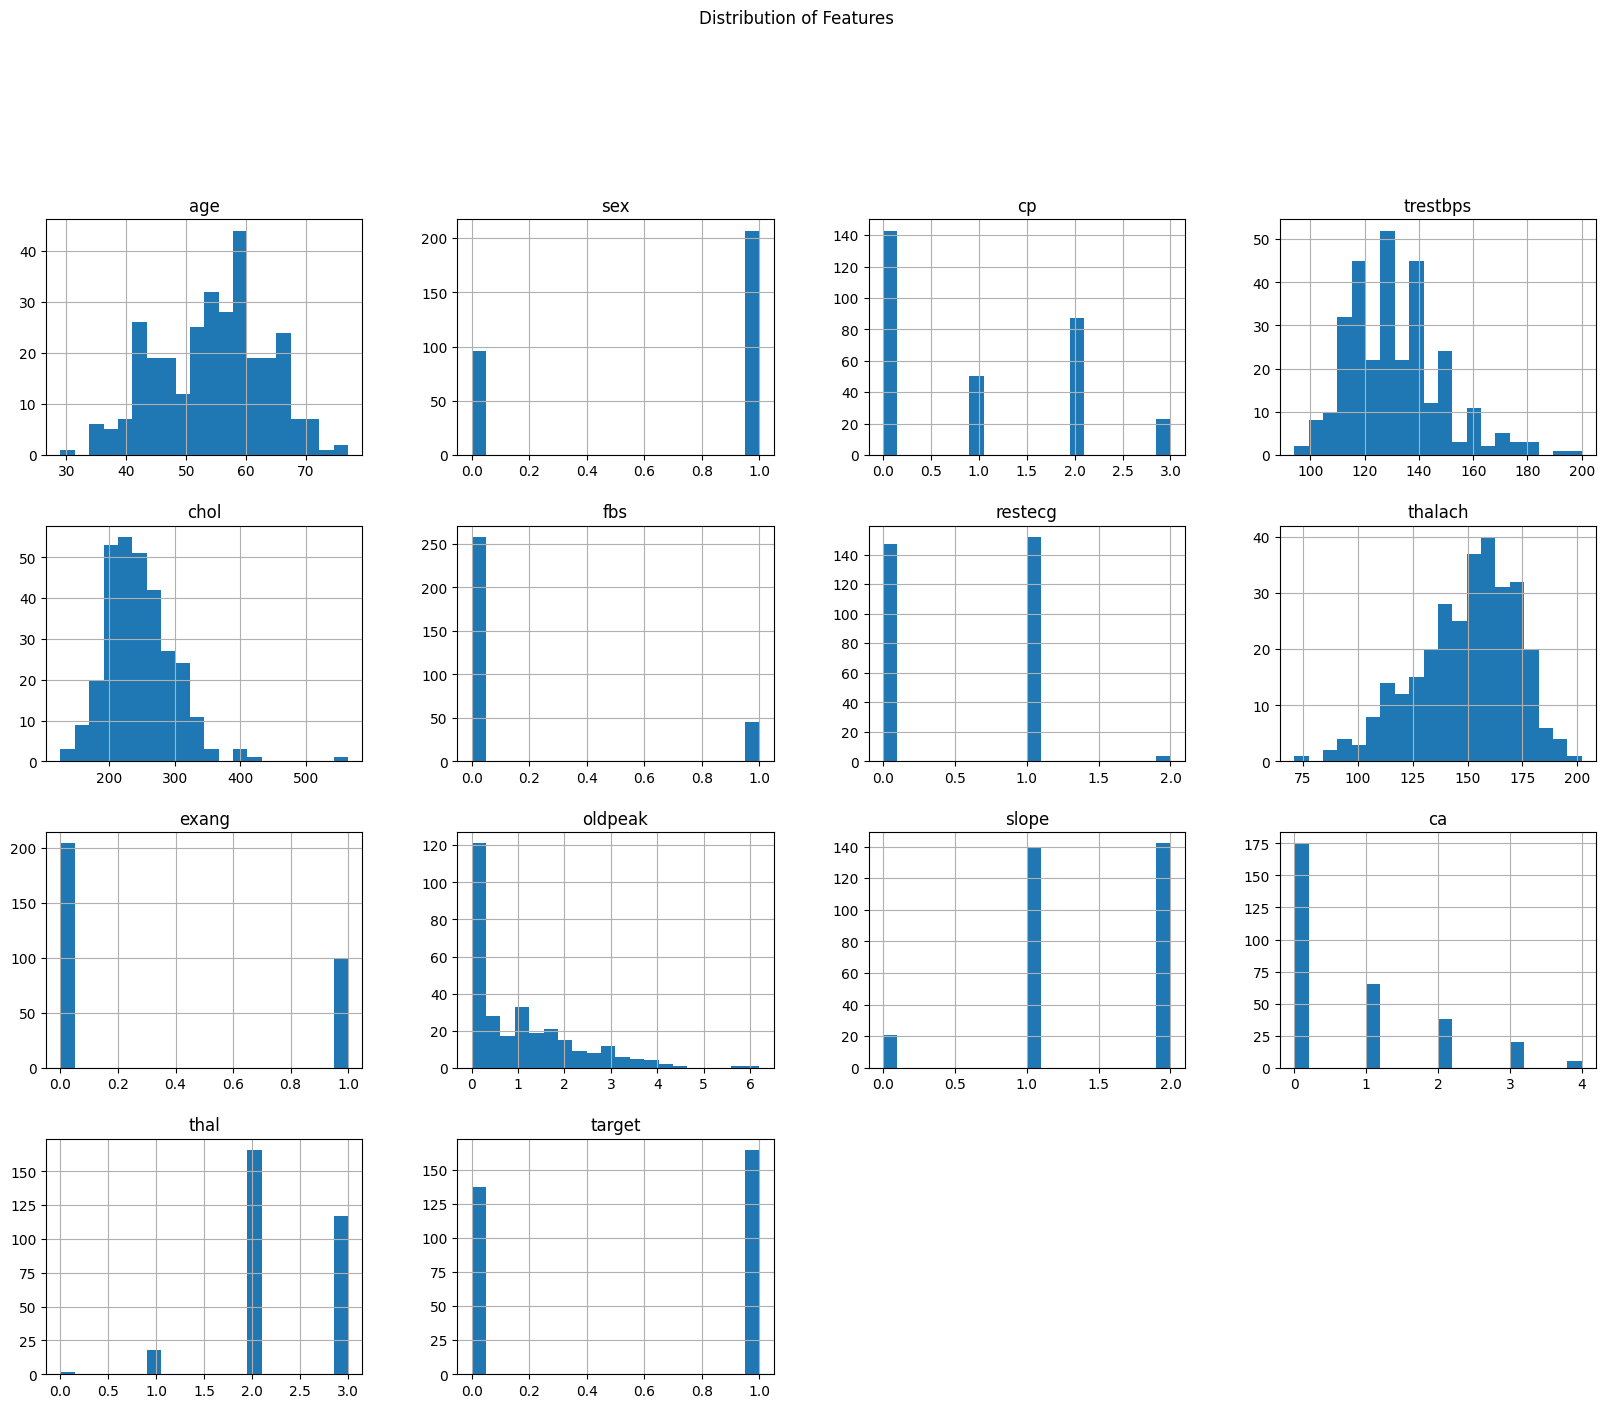

In [ ]:
plt.figure(figsize=(20, 15))
df2.hist(bins=20, figsize=(20, 15))
plt.suptitle('Distribution of Features', y=1.02)
plt.show()


# Target Distribution

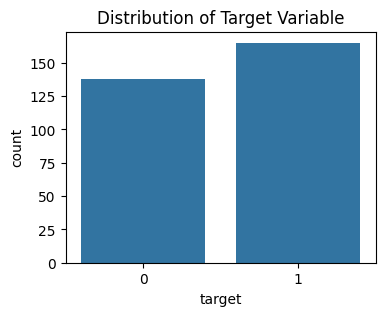

In [ ]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df2, x='target')
plt.title('Distribution of Target Variable')
plt.show()

# Correlation matrix for eeach attribute


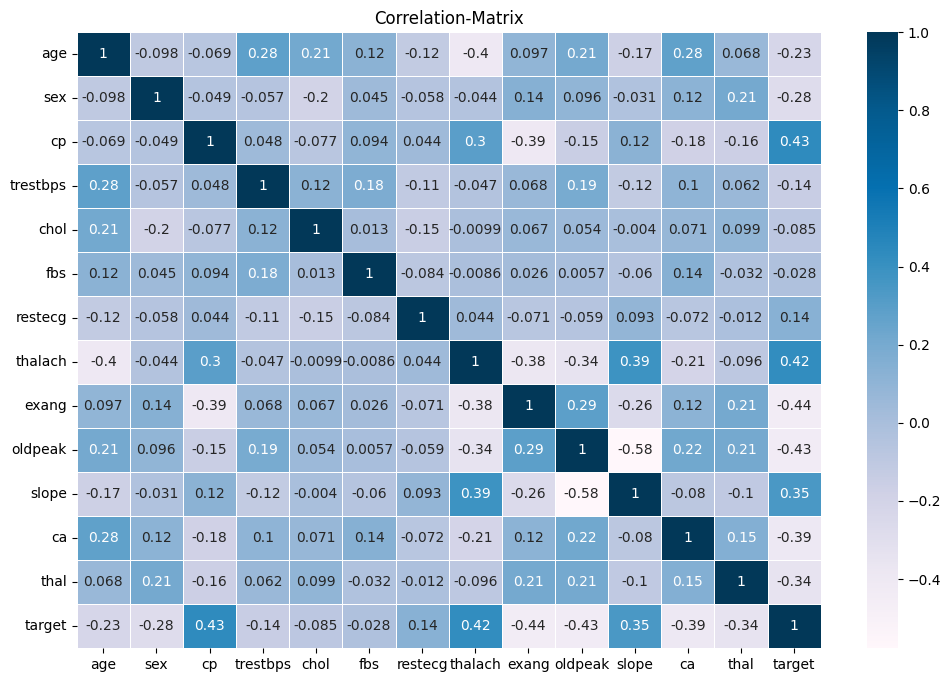

In [ ]:
plt.figure(figsize=(12,8))
corr_m = df2.corr()
sns.heatmap(corr_m, annot=True,cmap="PuBu",linewidths=0.5)
plt.title('Correlation-Matrix')
plt.show()

# Boxplot on each attribute for identifing the outliers.

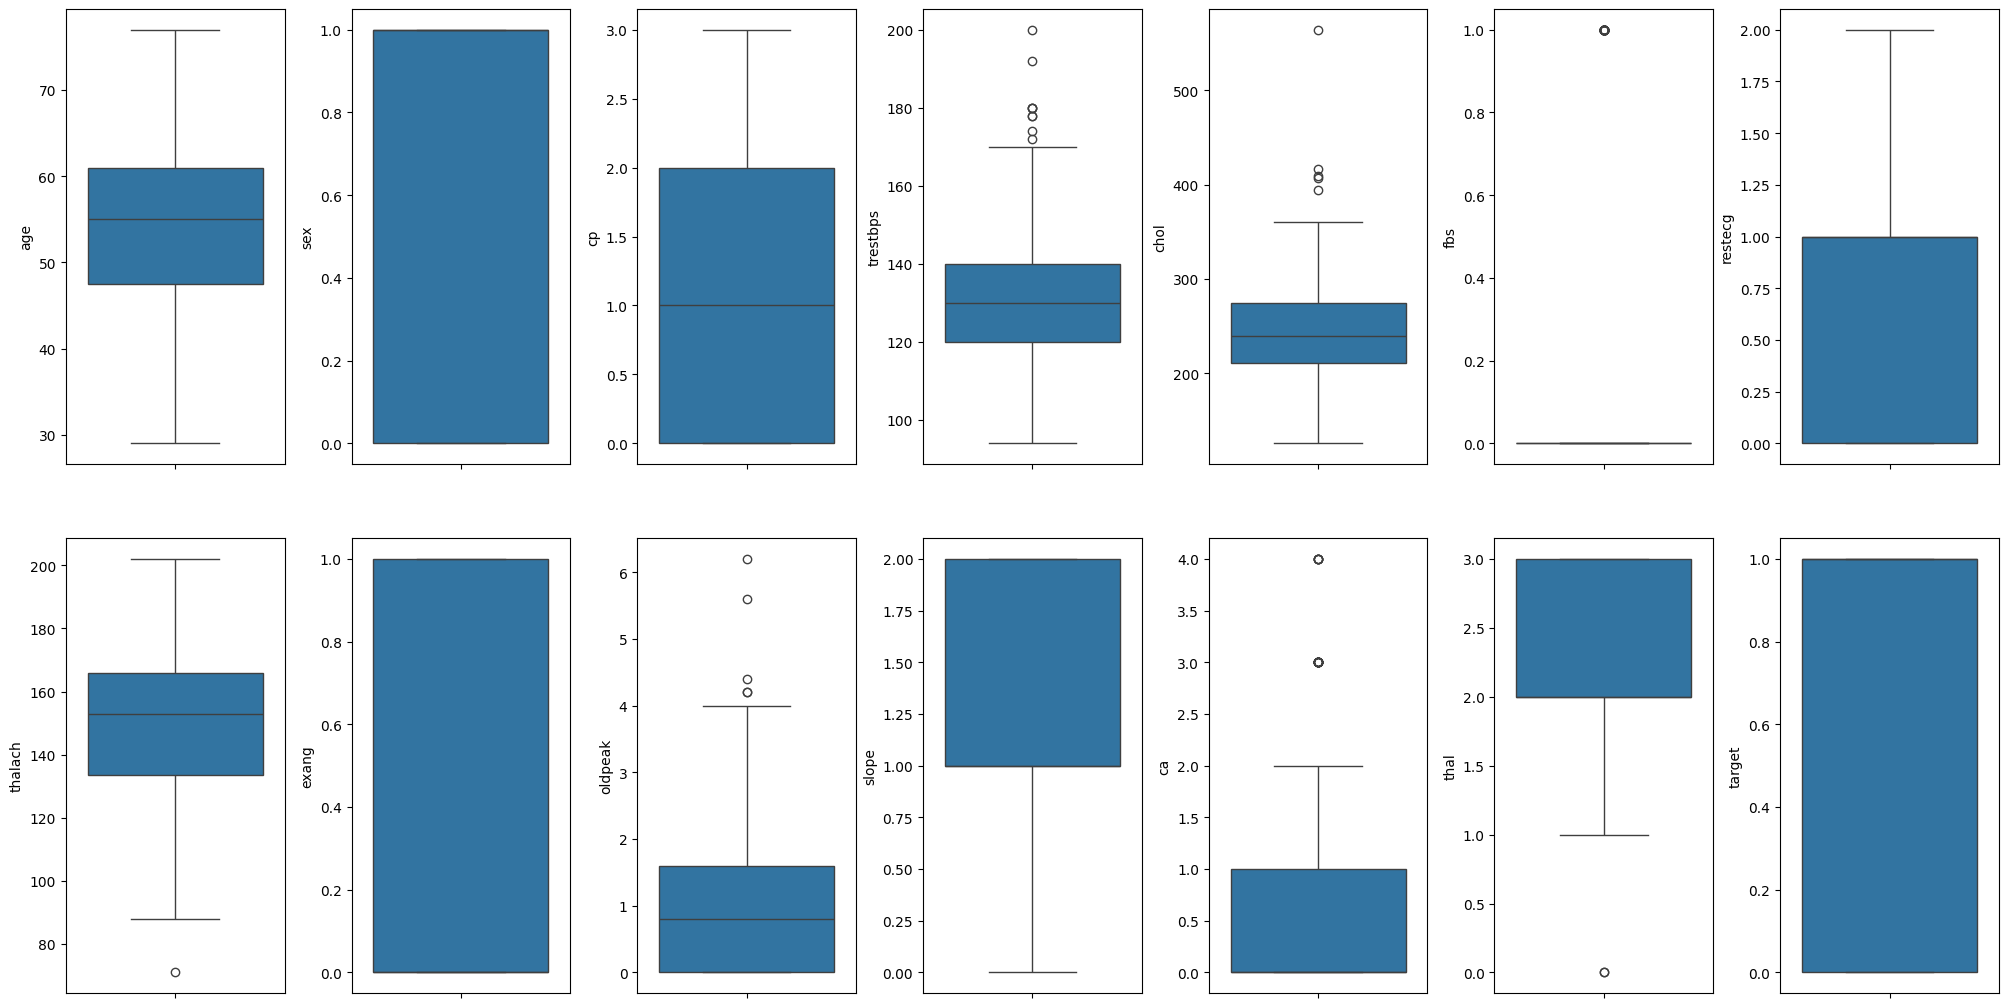

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten() # Converts the 2D array of Axes (subplots) into a 1D array, making it easier to iterate over all subplots in a single loop.
for k,v in df2.items():
    sns.boxplot(y=k, data=df2, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Finding the percentage of the outliers

In [ ]:
for k, v in df2.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
    percentage = np.shape(v_col)[0] * 100.0 / np.shape(df2)[0]
    print("Column %s outliers = %.2f%%" % (k, percentage))


Column age outliers = 0.00%
Column sex outliers = 0.00%
Column cp outliers = 0.00%
Column trestbps outliers = 4.29%
Column chol outliers = 1.65%
Column fbs outliers = 100.00%
Column restecg outliers = 0.00%
Column thalach outliers = 0.33%
Column exang outliers = 0.00%
Column oldpeak outliers = 2.64%
Column slope outliers = 0.00%
Column ca outliers = 8.25%
Column thal outliers = 0.66%
Column target outliers = 0.00%


# Defining the independent variables and the target variable
# Data splitting as training (80%) and testing (20%) datasets
# Model building and Evaluation.

In [ ]:
# Define independent variables (X) and dependent variable (Y)
X = df2.drop(columns=['target'])
Y = df2['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Ensure y_train and y_test are 1-dimensional arrays
y_train = y_train.values
y_test = y_test.values

# Fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Finding the confusion matrix
# Finding the Classification report

In [ ]:
cm = confusion_matrix(y_test, predictions)
print("Confusion matrix: ")
print(cm)
print("\n Classification report: ")
print(classification_report(y_test, predictions))

Confusion matrix: 
[[25  4]
 [ 4 28]]

 Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



# ROC Curve and AUC

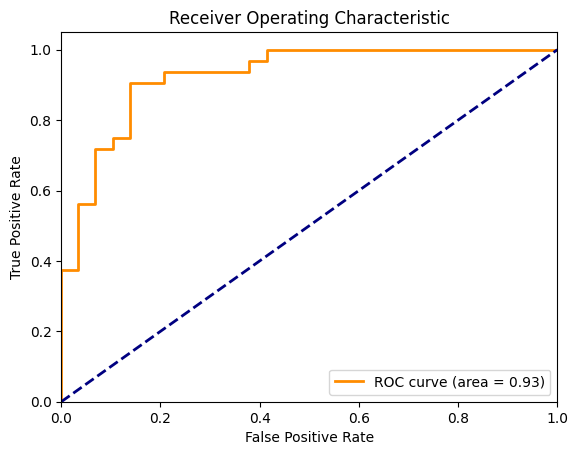

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Statistical Operations
## Error matrix

In [ ]:
ME = np.mean(predictions - y_test)
MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)
MPE = np.mean((predictions - y_test) / y_test) * 100
MAPE = np.mean(np.abs((predictions - y_test) / y_test)) * 100

print(f'Mean Error (ME): {ME}')
print(f'Mean Absolute Error (MAE): {MAE}')
print(f'Mean Squared Error (MSE): {MSE}')
print(f'Root Mean Squared Error (RMSE): {RMSE}')
print(f'Mean Percentage Error (MPE): {MPE}%')
print(f'Mean Absolute Percentage Error (MAPE): {MAPE}%')


Mean Error (ME): 0.0
Mean Absolute Error (MAE): 0.13114754098360656
Mean Squared Error (MSE): 0.13114754098360656
Root Mean Squared Error (RMSE): 0.3621429841700741
Mean Percentage Error (MPE): nan%
Mean Absolute Percentage Error (MAPE): nan%


<ipython-input-26-2c87163ed9ba>:5: RuntimeWarning: divide by zero encountered in divide
  MPE = np.mean((predictions - y_test) / y_test) * 100
<ipython-input-26-2c87163ed9ba>:5: RuntimeWarning: invalid value encountered in divide
  MPE = np.mean((predictions - y_test) / y_test) * 100
<ipython-input-26-2c87163ed9ba>:6: RuntimeWarning: divide by zero encountered in divide
  MAPE = np.mean(np.abs((predictions - y_test) / y_test)) * 100
<ipython-input-26-2c87163ed9ba>:6: RuntimeWarning: invalid value encountered in divide
  MAPE = np.mean(np.abs((predictions - y_test) / y_test)) * 100


In [ ]:
cv_scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print(f'Cross-Validation Accuracy: {np.mean(cv_scores)}')

Cross-Validation Accuracy: 0.8182795698924732


# Resudial plot

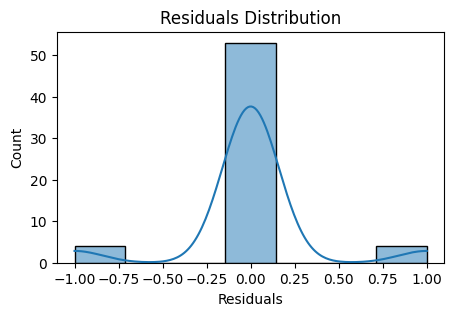

In [ ]:
# residual plot
residuals = y_test - predictions
plt.figure(figsize=(5,3 ))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()


# Logit Regression Results

In [ ]:
# Additional Statistical Metrics
X2 = sm.add_constant(X)
logit_model = sm.Logit(Y, X2)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.348904
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           13
Date:                Tue, 10 Dec 2024   Pseudo R-squ.:                  0.4937
Time:                        07:12:14   Log-Likelihood:                -105.72
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 7.262e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4505      2.571      1.342      0.180      -1.590       8.490
age           -0.0049      0.

# Additional Metrics and Tests

In [ ]:
from scipy.stats import jarque_bera
# Log Likelihood
log_likelihood = result.llf
print(f'Log Likelihood: {log_likelihood}')

# Akaike Information Criterion (AIC)
aic = result.aic
print(f'Akaike Information Criterion (AIC): {aic}')

# Bayesian Information Criterion (BIC)
bic = result.bic
print(f'Bayesian Information Criterion (BIC): {bic}')

# Omnibus Test
omnibus = result.llr
print(f'Omnibus: {omnibus}')

# Jarque-Bera Test
jb = jarque_bera(residuals)
print(f'Jarque-Bera (JB) Test: {jb}')

# Durbin-Watson Statistic
durbin_watson = sm.stats.durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {durbin_watson}')


Log Likelihood: -105.71798609516773
Akaike Information Criterion (AIC): 239.43597219033546
Bayesian Information Criterion (BIC): 291.4282314674666
Omnibus: 206.20208445914437
Jarque-Bera (JB) Test: SignificanceResult(statistic=54.36783854166664, pvalue=1.563773553843137e-12)
Durbin-Watson Statistic: 1.75


# Conclusion

#### In this project, we successfully created a logistic regression model to predict heart disease. Through comprehensive data preprocessing and exploratory data analysis, we identified significant patterns in the dataset. The model's performance was evaluated using a confusion matrix, classification report, and ROC curve, demonstrating its ability to accurately predict heart disease. Key metrics such as accuracy, precision, recall, and AUC validated the model's effectiveness. This project highlights the potential of logistic regression in medical predictions and underscores the importance of thorough data analysis in building reliable models.